- id - идентификатор пациента
- diagnosis (M = malignant, B = benign) – диагноз (M – злокачественная
опухоль, B – доброкачественная) 

Для каждого ядра клетки вычисляются следующие десять характеристик:
- radius – радиус
- texture – текстура
- perimeter – периметр
- area – площадь
- smoothness – гладкость
- compactness (perimeter^2 / area - 1.0) – компактность
- concavity – вогнутость (выраженность вогнутых участков контура)
- concave points – вогнутые точки (количество вогнутых участков контура)
- symmetry – симметрия
- fractal dimension – фрактальная размерность 

1. Загрузите данные в DataFrame с помощью функции read_csv() библиотеки
pandas.


In [2]:
import pandas as ps

data = ps.read_csv('data_cancer_1.xls')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


2. Как распределились данные по классам? 
Сколько наблюдений имеют в столбце diagnosis значением M, сколько B? 
Для ответа на вопросы используйте метод .value_counts() библиотеки pandas.


In [2]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

3. Перекодируйте значения M и B в столбце diagnosis в числовые метки 1 и -1.
Для этого можно использовать метод map:

In [3]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': -1}) 
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


4. Вычислите корреляционную матрицу с помощью метода corr(). Для
удобства можно отобразить результаты на тепловой карте:
- Какие переменные коррелируют с переменной diagnosis? Какие не
коррелируют? Какие переменные сильно коррелируют между собой?

<AxesSubplot:>

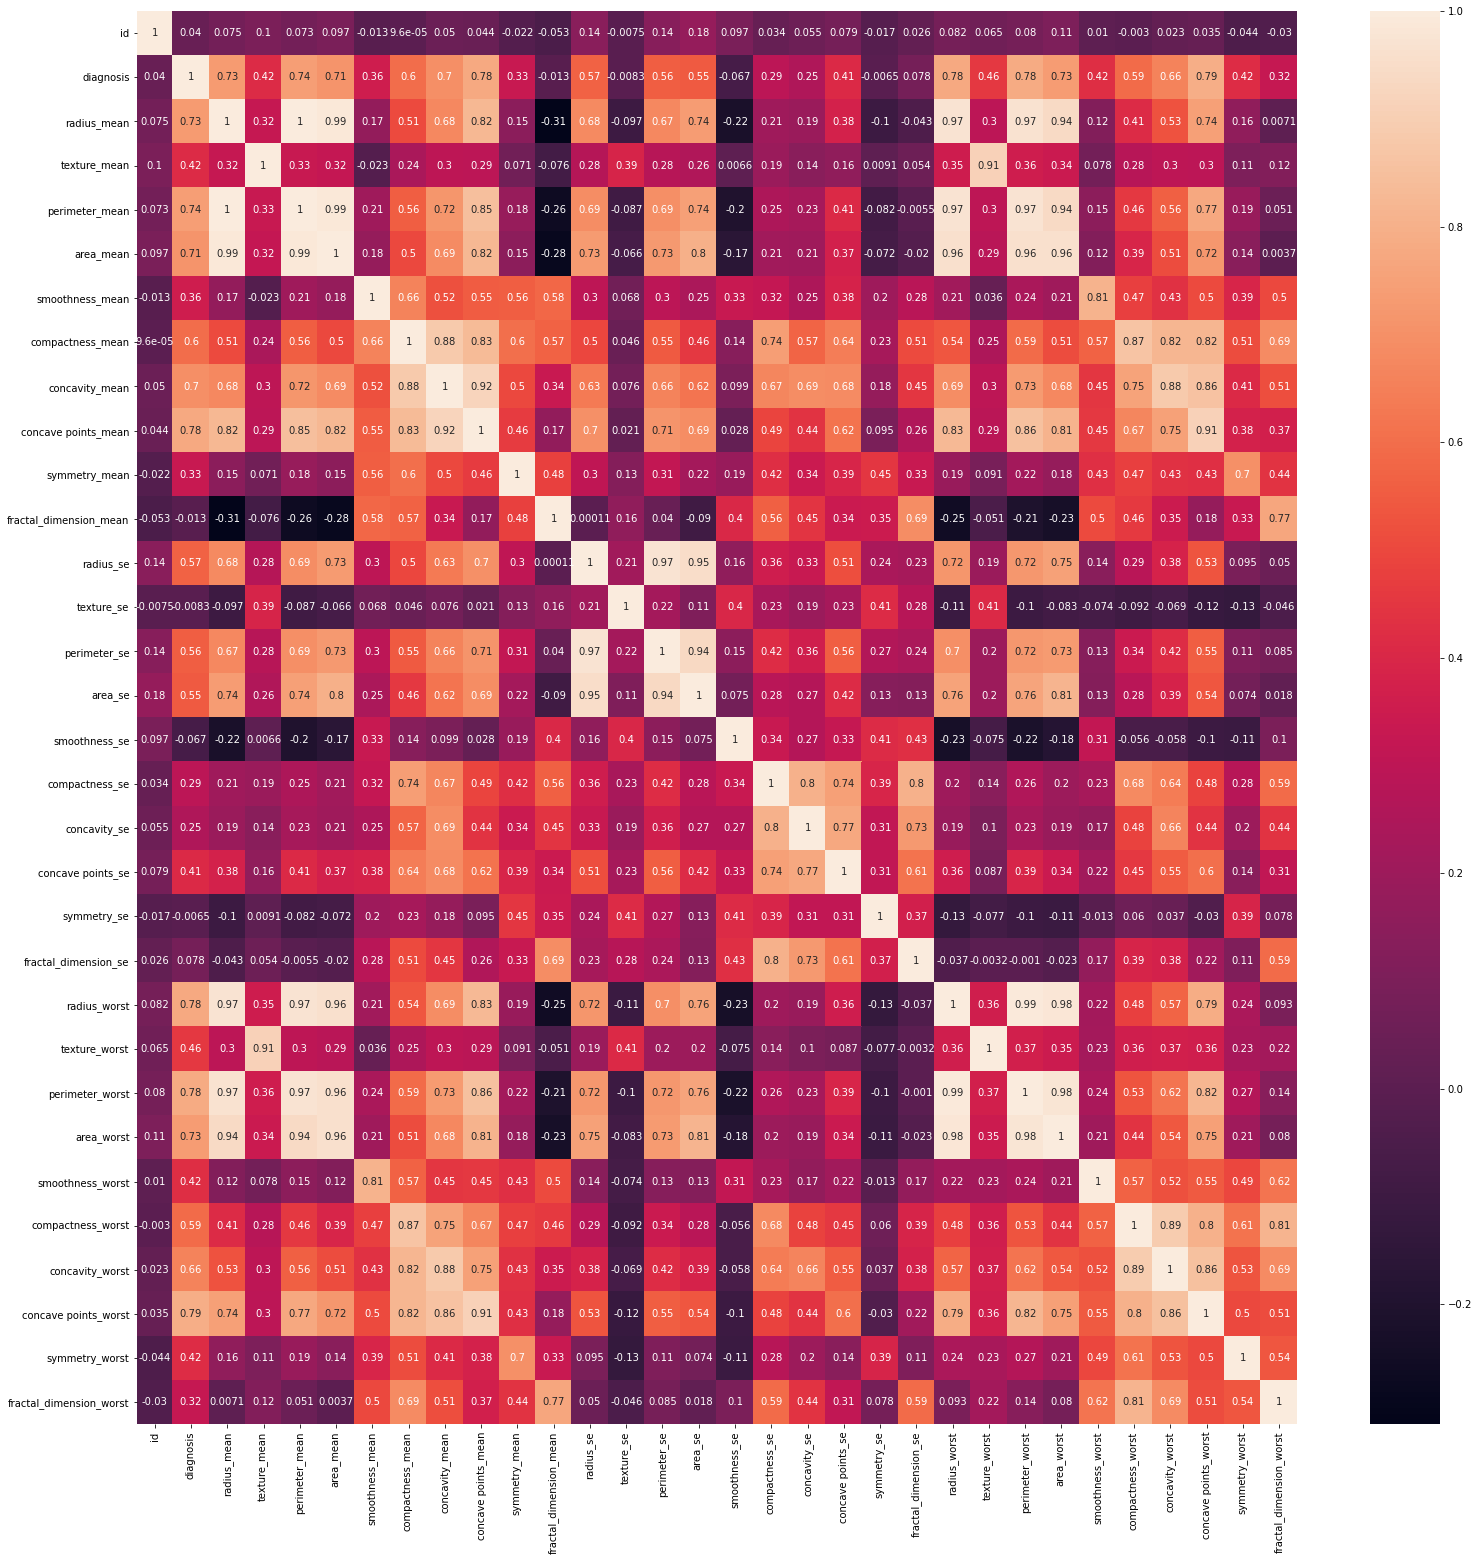

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(26, 26))
sns.heatmap(data.corr(), annot=True)

Корреляция Пирсона:

- Если r равен -1.0 либо 1.0, то переменные идеально антикоррелируют либо идеально коррелируют.
- Если r = 0, то с необходимостью вовсе не следует, что переменные не коррелируют. Корреляция Пирсона измеряет лишь линейные связи.

Чем ближе значение к 1.0, тем лучше переменные коррелируют между собой.  

5. Проанализируйте значения признаков для двух подвыборок (diagnosis = 1 и
diagnosis = -1) с помощью диаграмм размаха.
- Какие выводы можно сделать?

C:\Users\auses\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


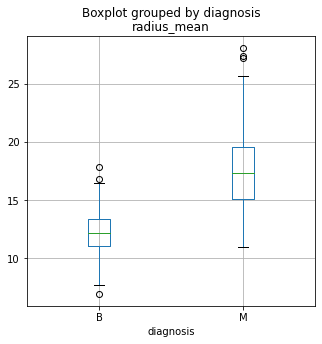

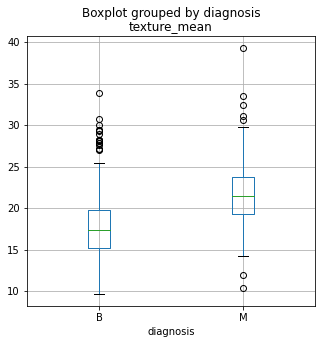

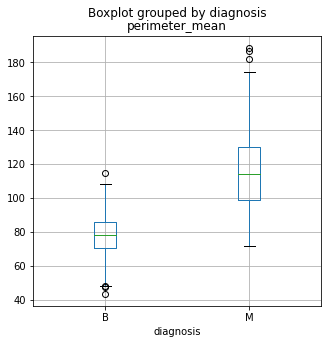

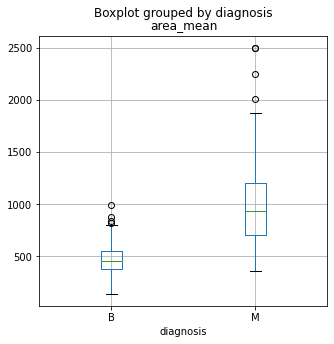

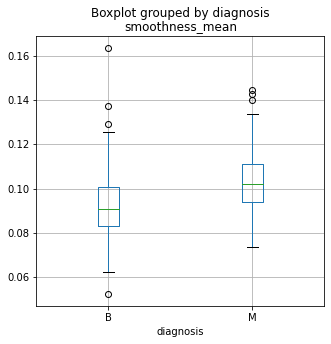

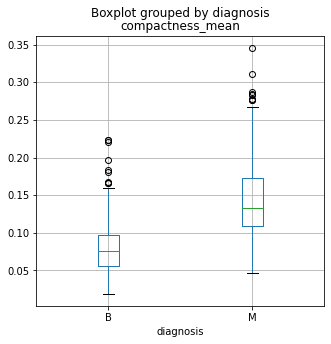

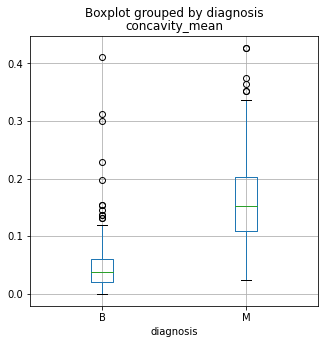

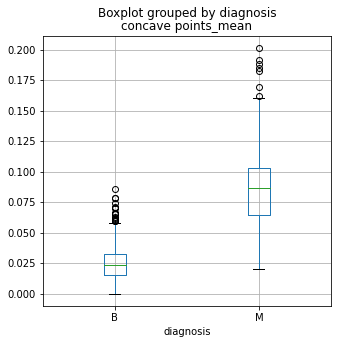

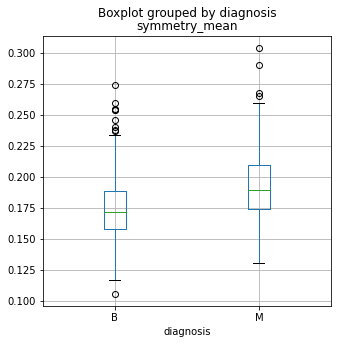

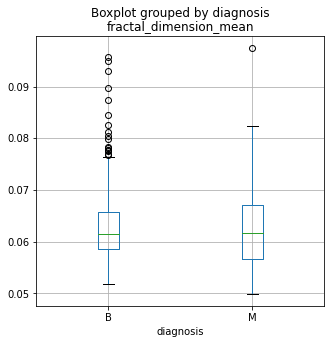

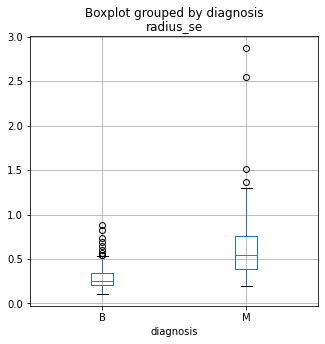

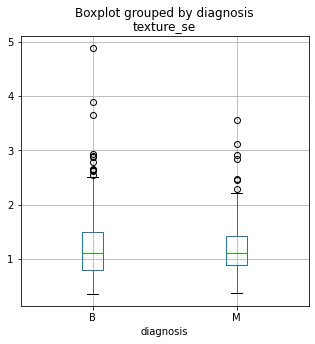

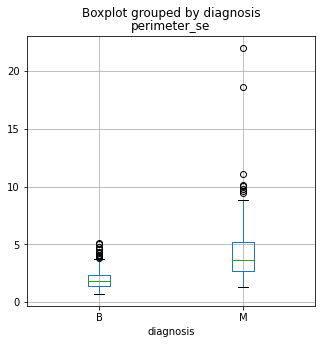

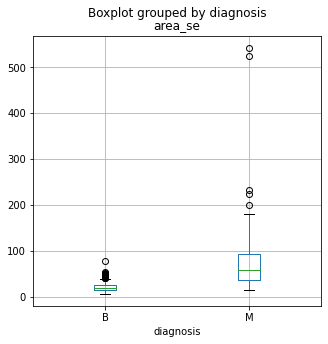

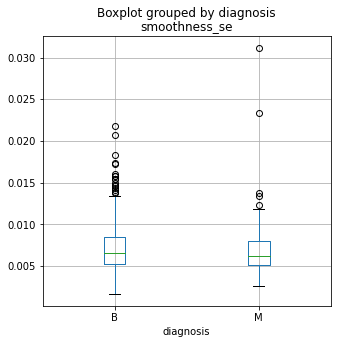

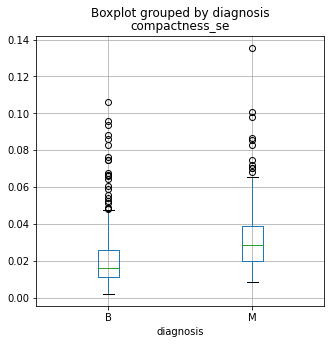

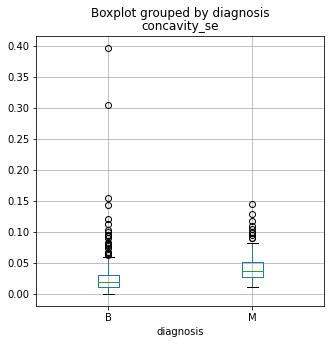

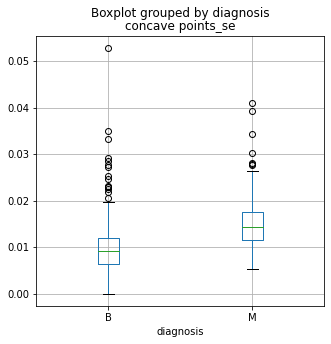

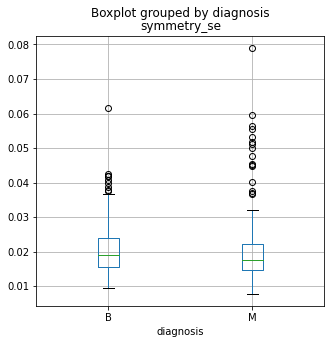

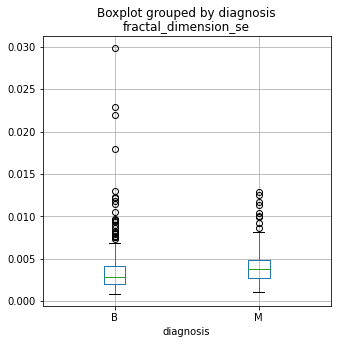

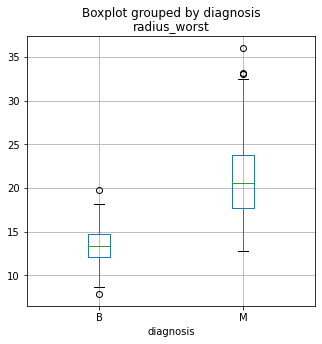

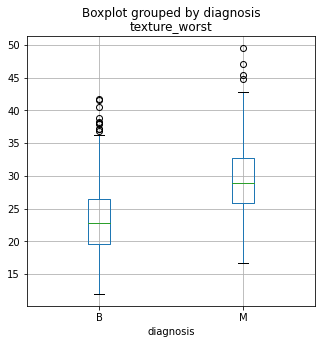

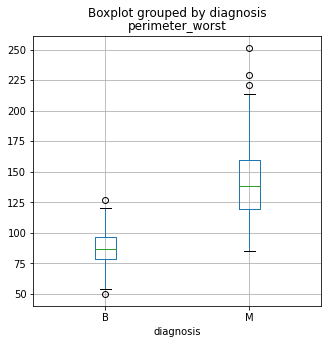

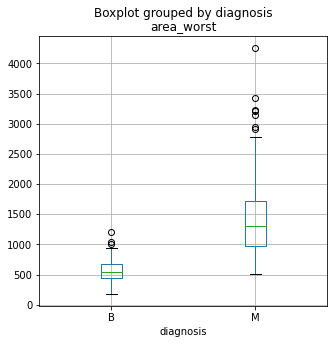

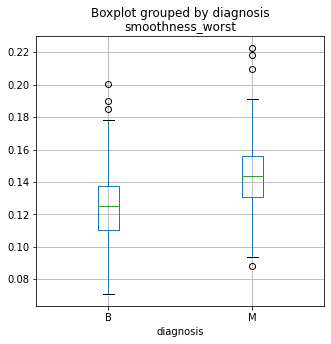

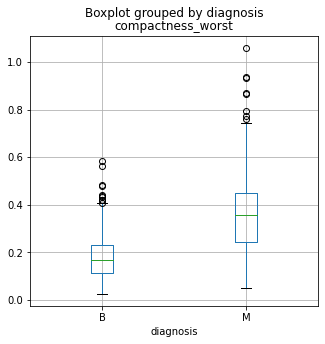

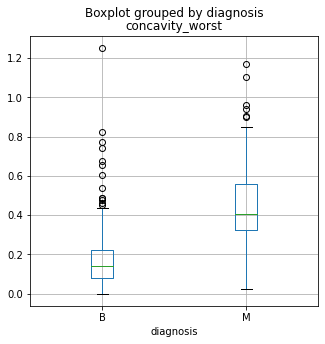

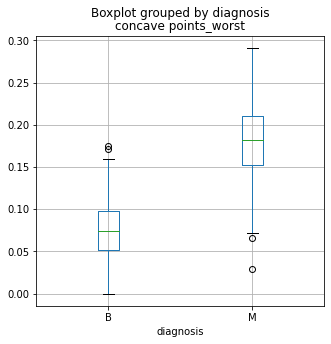

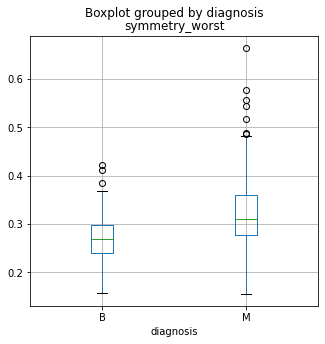

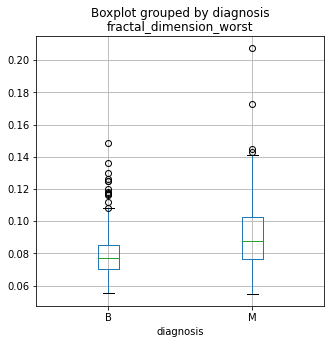

In [3]:
item = ['radius_mean', 
    'texture_mean', 
    'perimeter_mean', 
    'area_mean', 
    'smoothness_mean', 
    'compactness_mean', 
    'concavity_mean', 
    'concave points_mean',
    'symmetry_mean', 
    'fractal_dimension_mean', 
    'radius_se', 
    'texture_se', 
    'perimeter_se',
    'area_se', 
    'smoothness_se', 
    'compactness_se', 
    'concavity_se', 
    'concave points_se', 
    'symmetry_se', 
    'fractal_dimension_se', 
    'radius_worst', 
    'texture_worst', 
    'perimeter_worst', 
    'area_worst', 
    'smoothness_worst',
    'compactness_worst', 
    'concavity_worst', 
    'concave points_worst', 
    'symmetry_worst', 
    'fractal_dimension_worst']

for i in range(len(item)):
    data.boxplot(column = item[i], by = 'diagnosis', figsize=(5, 5))

6. На основе результатов, полученных в пунктах 4 и 5, сделайте вывод о том,
какие переменные являются информативными, а какие можно не
рассматривать при постановке диагноза.

Переменные с лучшей корреляцией являются информативными, в отличие от переменных с отрицательной корреляцией.